In [1]:
import glob

import pandas as pd

/home/jwei/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jwei/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Aggregate dev data (2015, 2016)

In [2]:
da = glob.glob('./dev/*/*/*.human.*')
print('\n'.join(da))

./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.en-ru
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.fi-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.cs-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.de-en
./dev/2015/DAseg-wmt-newstest2015/DAseg.newstest2015.human.ru-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.tr-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.ru-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.cs-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.de-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.fi-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.ro-en
./dev/2016/DAseg-wmt-newstest2016/DAseg.newstest2016.human.en-ru


In [3]:
cols = ['human', 'mt-system', 'reference', 'source']
data = { 'src':[], 'trg':[], 'set':[], 'source':[], 'reference':[], 'mt-system':[], 'human':[] }

for rating in da:
    attr = rating.split('.')
    lp = attr[-1]
    test_set = attr[-3]
    print('Processing %s, %s...' % (test_set, lp))
    
    length = len(list(open(rating, 'rt')))
    
    data['src'].extend(length * [lp[:2]])
    data['trg'].extend(length * [lp[3:]])
    data['set'].extend(length * [test_set])
    
    for col in cols:
        attr[-2] = col
        path = '.'.join(attr)
        
        data[col].extend([ i.strip() for i in open(path, 'rt') ])

Processing newstest2015, en-ru...
Processing newstest2015, fi-en...
Processing newstest2015, cs-en...
Processing newstest2015, de-en...
Processing newstest2015, ru-en...
Processing newstest2016, tr-en...
Processing newstest2016, ru-en...
Processing newstest2016, cs-en...
Processing newstest2016, de-en...
Processing newstest2016, fi-en...
Processing newstest2016, ro-en...
Processing newstest2016, en-ru...


In [19]:
dev = pd.DataFrame(data=data)
dev[['human']] = dev[['human']].apply(pd.to_numeric)
dev.describe()

,human
count,6420.000000
mean,-0.031175
std,0.584579
min,-1.953796
25%,-0.479059
50%,-0.036177
75%,0.411044
max,1.652295


### Dev data statistics

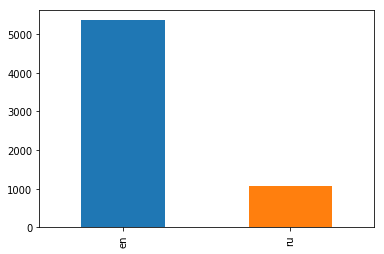

In [20]:
dev['trg'].value_counts().plot(kind='bar')

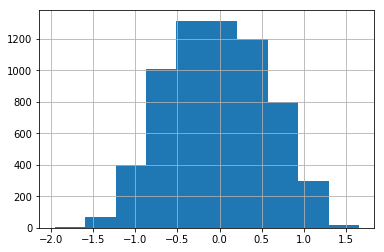

In [22]:
dev['human'].hist()

### Aggregate test data (2017)